## Module 4 challenge

# Prepare the data

In [232]:
# import liabraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

In [233]:
# setting the file path
sp_tsx_data = Path('/Users/asanyusuf/desktop/Starter_Code/Resources/sp_tsx_history.csv')
whale_data = Path('/Users/asanyusuf/desktop/Starter_Code/Resources/whale_returns.csv')
algo_data = Path('/Users/asanyusuf/desktop/Starter_Code/Resources/algo_returns.csv')

# Read the CSVs and set the 'date' columns as a datetime index to the DataFrame
whale_df = pd.read_csv(whale_data, index_col = "Date", parse_dates=True, infer_datetime_format=True)
algo_df = pd.read_csv(algo_data, index_col = "Date", parse_dates=True, infer_datetime_format=True)
sp_tsx_df = pd.read_csv(sp_tsx_data, index_col = "Date", parse_dates=True, infer_datetime_format=True)


In [235]:
# chekcing data sample
whale_df.sample()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-03-15,0.003264,0.003948,0.005449,0.005083


In [236]:
# cleaning up data by getting rid of NaN values
whale_df = whale_df.dropna().copy()
algo_df = algo_df.dropna().copy()
sp_tsx_df = sp_tsx_df.dropna().copy()

In [240]:
# checking there is no Nan value left
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [241]:
sp_tsx_df.isnull().sum()


Close    0
dtype: int64

In [242]:
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [243]:
#  preparing date for "type" change by getting rid of "$" sign and "," 
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$","")
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",","")

/var/folders/th/dh_vvwjn2lgc5mt_jqf723mm0000gn/T/ipykernel_1786/1433722678.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$","")


In [245]:
# changing data from "object" to "float" / (str to int)
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype("float")

In [246]:
# calculating daily return and replacing column name to "S&P/TSX"
sp_tsx_df_return = sp_tsx_df.pct_change()
sp_tsx_df_return.columns= ["S&P/TSX"]
sp_tsx_df_return.head()

,S&P/TSX
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [164]:
sp_tsx_df_return = sp_tsx_df_return.dropna().copy()
sp_tsx_df_return.head()

,S&P/TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [247]:
# combining all 3 DataFrame by "columns"
all_returns = pd.concat([sp_tsx_df_return,algo_df,whale_df], axis="columns", join="inner")
all_returns

,S&P/TSX,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.008530,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.003371,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001344,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.009972,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.006555,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...
2019-04-25,-0.000628,0.000682,-0.007247,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.002254,0.002981,0.005256,0.008149,0.009162,0.012355,0.010434
2019-04-29,-0.000788,0.005208,0.002829,0.001254,0.002719,0.006251,0.005223


# Performance Analysis

<AxesSubplot:xlabel='Date'>

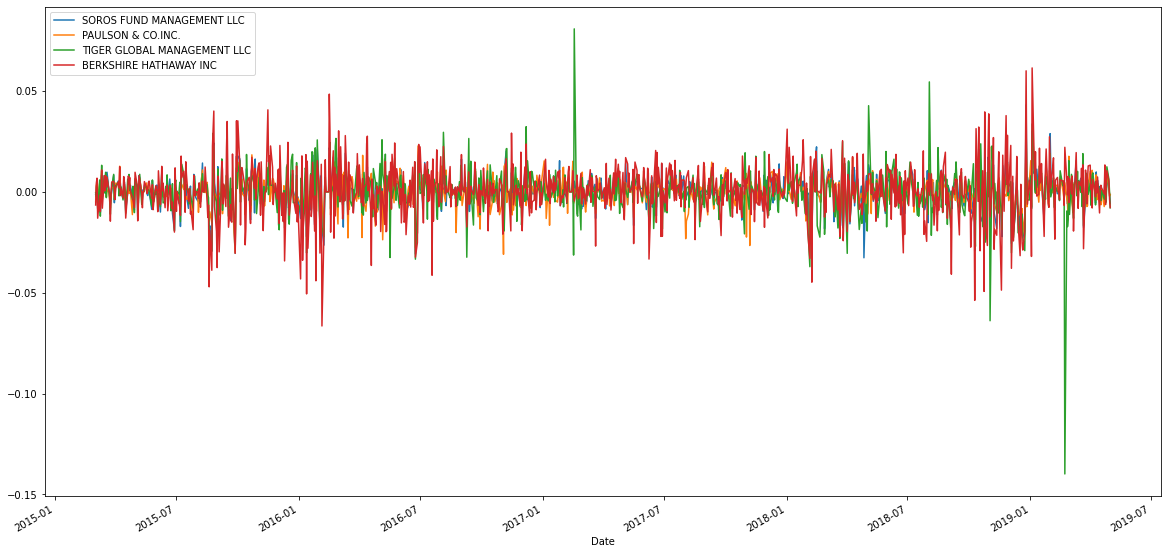

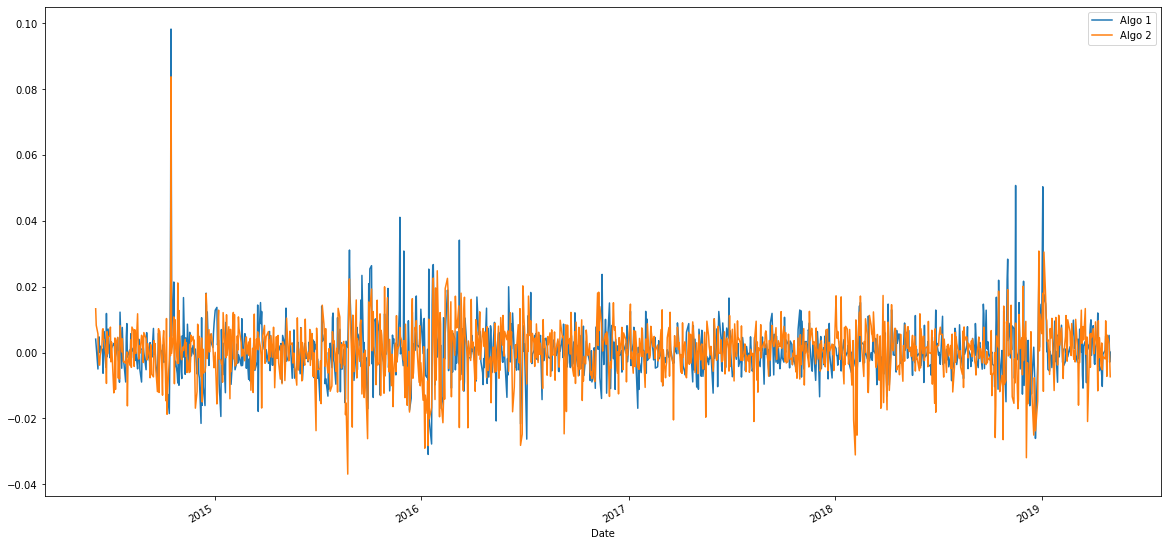

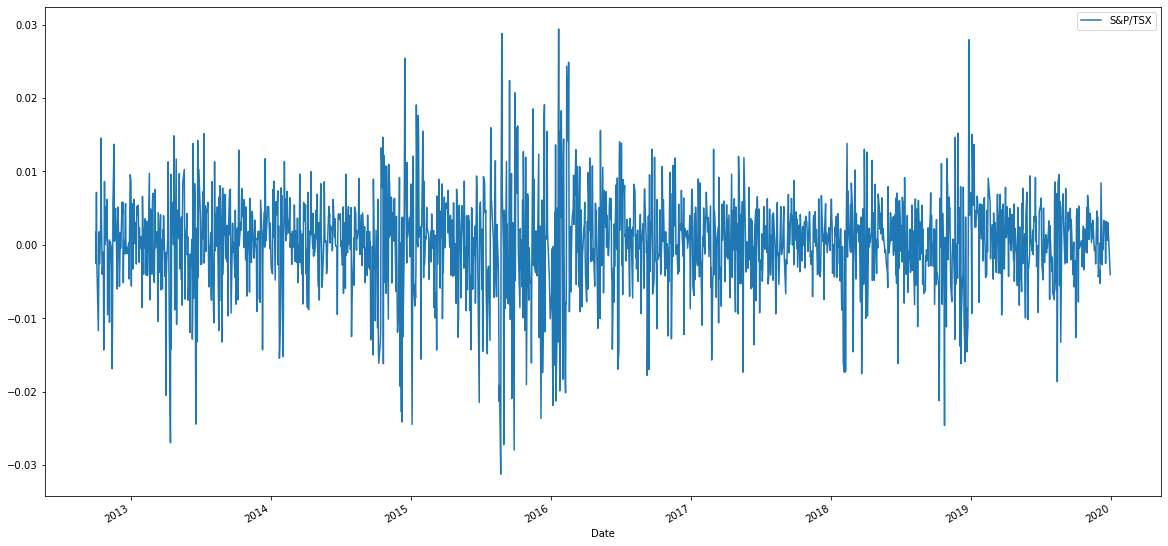

In [214]:
# ploting data
whale_df.plot(figsize=(20, 10))
algo_df.plot(figsize=(20, 10))
sp_tsx_df_return.plot(figsize=(20, 10))


<AxesSubplot:xlabel='Date'>

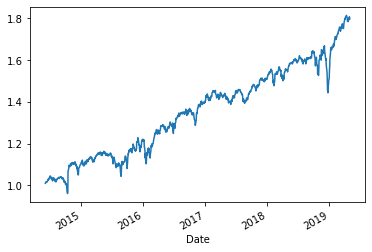

In [248]:
# setting weights for algo 1 and algo 2 
weights = [0.5,0.5]
# Using the "dot" function to multiply the weights by each column of daily returns to calculate the daily returns of the portfolio
algo_portfolio_return = algo_df.dot(weights)
# Using "cumprod" function to calculate cumulative returns
algo_cumulative = (1+ algo_portfolio_return).cumprod()
# computing cumulative returns
algo_cumulative.plot()

<AxesSubplot:xlabel='Date'>

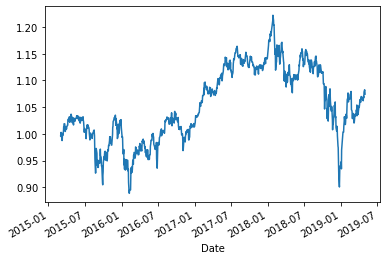

In [249]:
# same as above 
weights2 = [0.25,0.25,0.25,0.25]
whale_portfolio_return = whale_df.dot(weights2)
whale_cumulative = (1+whale_portfolio_return).cumprod()
whale_cumulative.plot()

<AxesSubplot:xlabel='Date'>

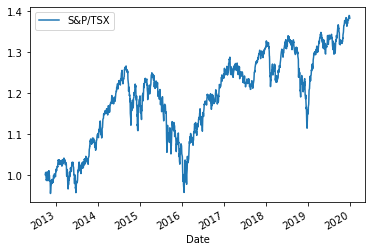

In [250]:
sp_tsx_cumulative = (1+ sp_tsx_df_return).cumprod()
sp_tsx_cumulative.plot()

## ANSWER:  Algorithmic portfolio outperforme S&P/TSX 60

# Risk analysis

<AxesSubplot:>

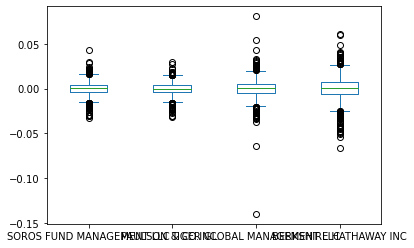

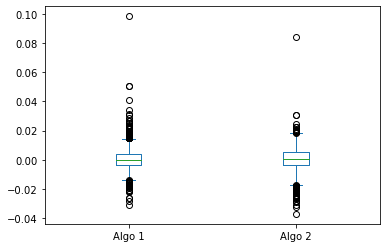

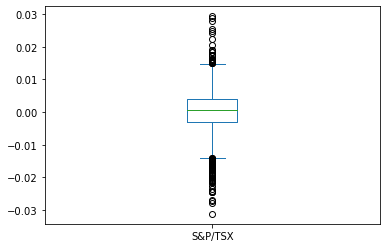

In [251]:
# plotting date in box visualization 
whale_df.plot.box()
algo_df.plot.box()
sp_tsx_df_return.plot.box()

In [252]:
# calculating standard deviations by using "std" function
whale_std = whale_df.std()
whale_std = whale_std.sort_values(ascending=False)
whale_std

BERKSHIRE HATHAWAY INC         0.012831
TIGER GLOBAL MANAGEMENT LLC    0.010824
SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
dtype: float64

In [184]:
algo_std = algo_df.std()
algo_std = algo_std.sort_values(ascending=False)
algo_std

Algo 2    0.008466
Algo 1    0.007988
dtype: float64

In [185]:
sp_tsx_std = sp_tsx_df_return.std()
sp_tsx_std

S&P/TSX    0.006637
dtype: float64

# 3. All portfolios are riskier than the S&P TSX60

In [253]:
# calculation annualized standard deviations considering 252 trading days
whale_std_annualized = whale_std* np.sqrt(252)
whale_std_annualized

BERKSHIRE HATHAWAY INC         0.203682
TIGER GLOBAL MANAGEMENT LLC    0.171830
SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
dtype: float64

In [254]:
algo_std_annualized = algo_std* np.sqrt(252)
algo_std_annualized

Algo 2    0.134401
Algo 1    0.126801
dtype: float64

In [255]:
sp_tsx_std_annualized = sp_tsx_std*np.sqrt(252)
sp_tsx_std_annualized

S&P/TSX    0.105365
dtype: float64

# Rolling Statistics

<AxesSubplot:xlabel='Date'>

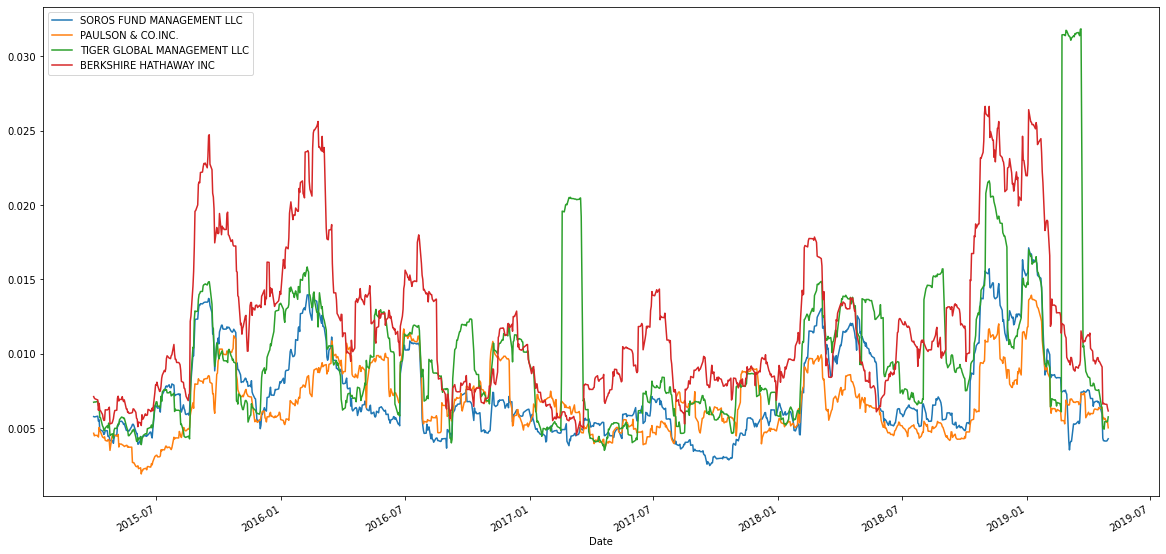

In [256]:
# Plotting rolling 21 day std dev of whale portfolio
whale_df.rolling(window=21).std().plot(figsize=(20, 10))

<AxesSubplot:xlabel='Date'>

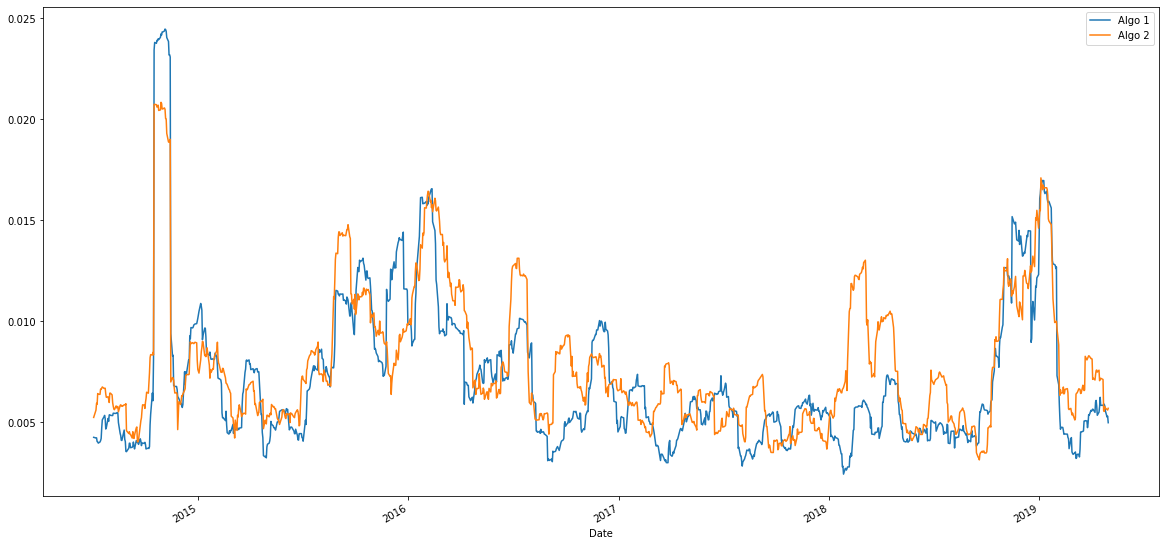

In [212]:
algo_df.rolling(window=21).std().plot(figsize=(20, 10))

<AxesSubplot:xlabel='Date'>

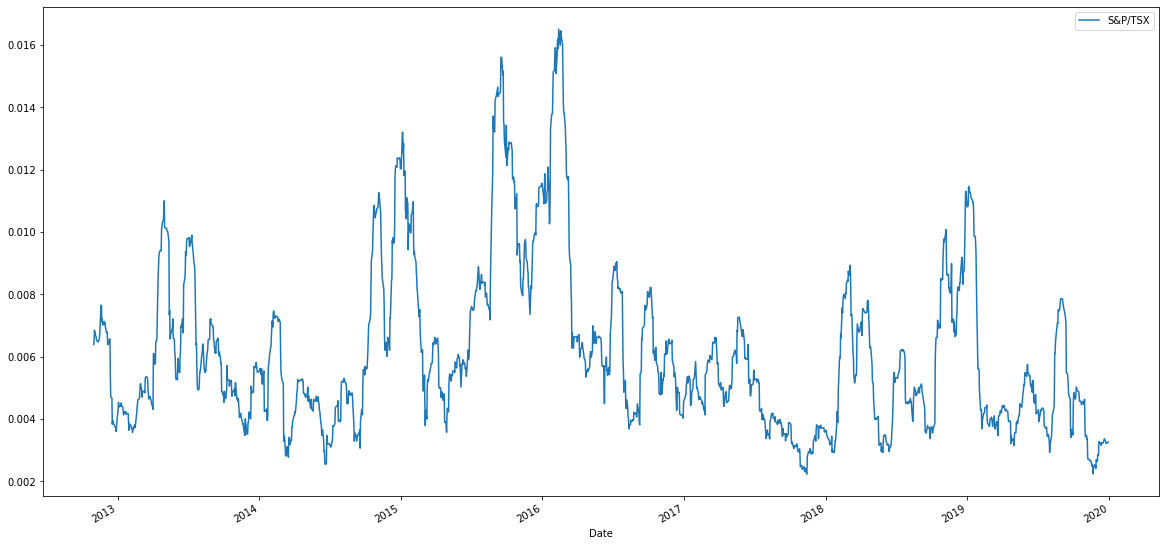

In [211]:
sp_tsx_df_return.rolling(window=21).std().plot(figsize=(20, 10))

In [259]:
#  calculating 60- days rolling covariance  
rolling_covariance = all_returns['Algo 1'].rolling(window=60).cov(all_returns['S&P/TSX'])
rolling_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000002
2019-04-26    0.000002
2019-04-29    0.000002
2019-04-30    0.000002
2019-05-01    0.000002
Length: 1029, dtype: float64

<AxesSubplot:xlabel='Date'>

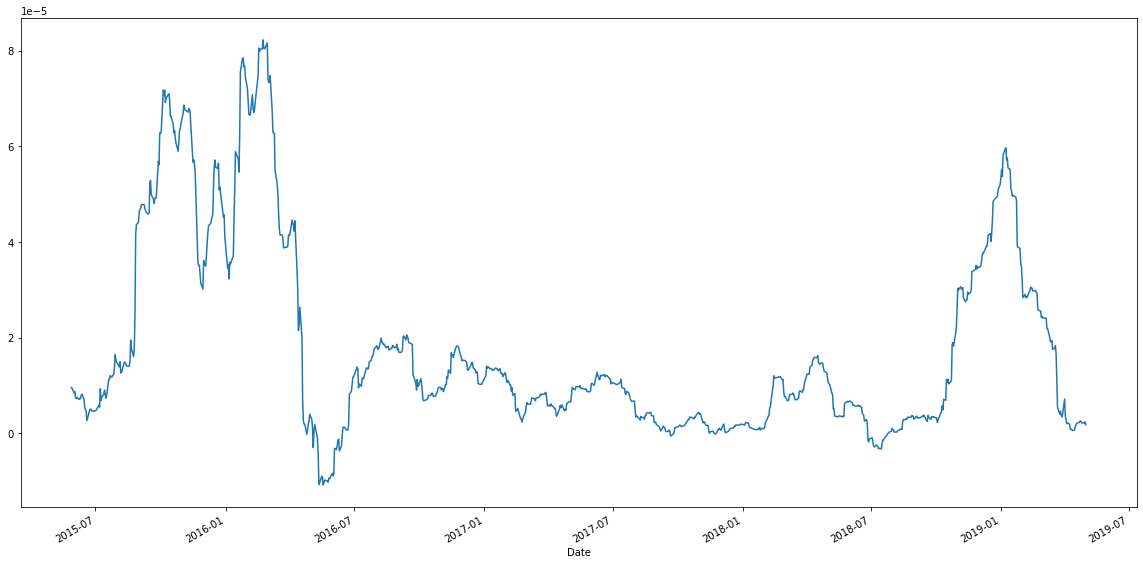

In [260]:
# plotting 60 days rolling covariance
rolling_covariance.plot(figsize=(20, 10))

<AxesSubplot:xlabel='Date'>

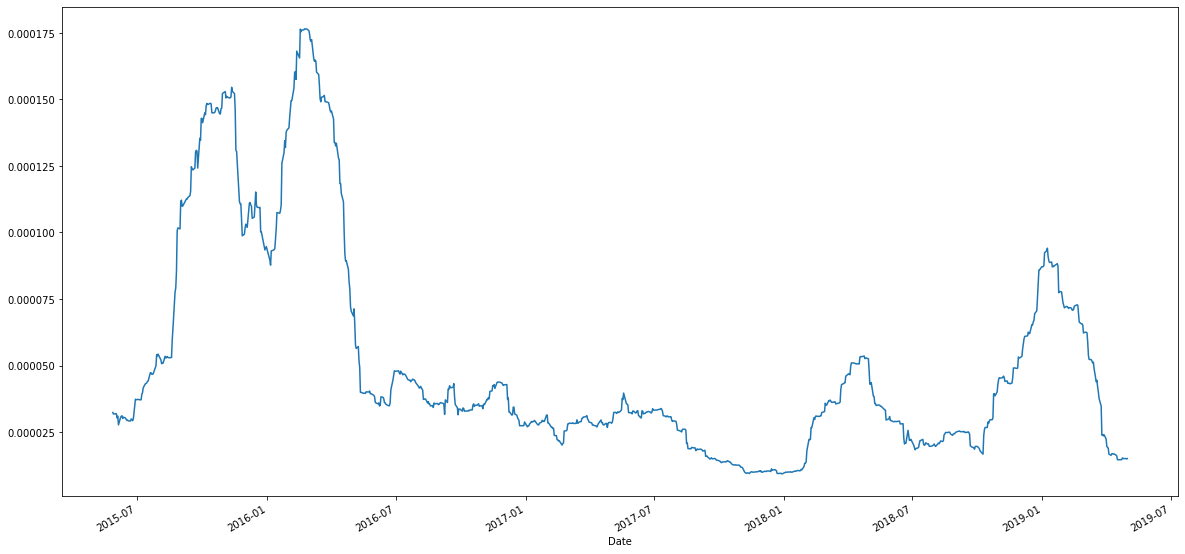

In [261]:
# calculating and plotting 60 days variance
rolling_variance = all_returns['S&P/TSX'].rolling(window=60).var()
rolling_variance.plot(figsize=(20,10))

<AxesSubplot:title={'center':'Rolling 60-day Beta of Algo 1'}, xlabel='Date'>

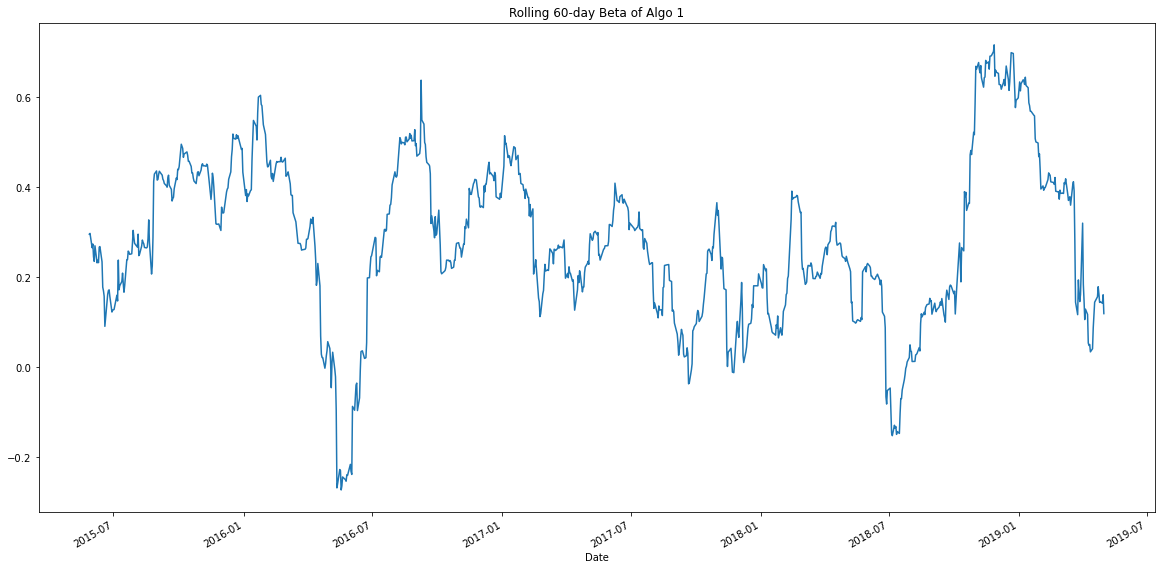

In [262]:
# calculating beta for Algo 1 and plotting the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20,10), title= 'Rolling 60-day Beta of Algo 1')

# Sharp Ratio

In [263]:
# calculating std dev for combine dataframe
all_returns_std = all_returns.std()

In [264]:
# calculating sharp ratios
sharp_ratios = (all_returns.mean()*252) /(all_returns_std*np.sqrt(252))
sharp_ratios.sort_values(ascending=False)

Algo 1                         1.491514
BERKSHIRE HATHAWAY INC         0.467045
Algo 2                         0.396817
SOROS FUND MANAGEMENT LLC      0.286709
S&P/TSX                        0.195550
TIGER GLOBAL MANAGEMENT LLC   -0.144455
PAULSON & CO.INC.             -0.547594
dtype: float64

<AxesSubplot:>

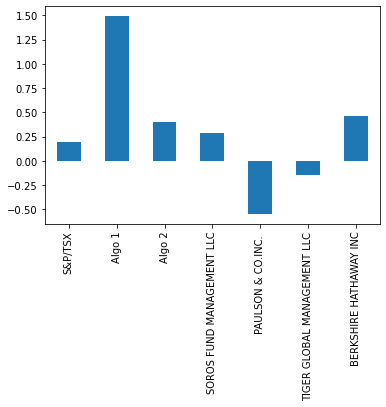

In [265]:
# plotting in bar chart
sharp_ratios.plot(kind="bar")

## 2. Algorithmic 1 portfolio has outperformed S&P/TSX60 and whales portfolios